# Read input, build DataFrame and plot the data points

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

plt.rcParams["figure.figsize"] = (10,10)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/likes.csv')

df.tail()

,Day,Likes
102,102,2495
103,103,2495
104,104,2499
105,105,2502
106,106,2511


[[   0    3    5    6   11   12   17   18   19   20]
 [2186 2206 2220 2224 2263 2266 2281 2285 2285 2288]]


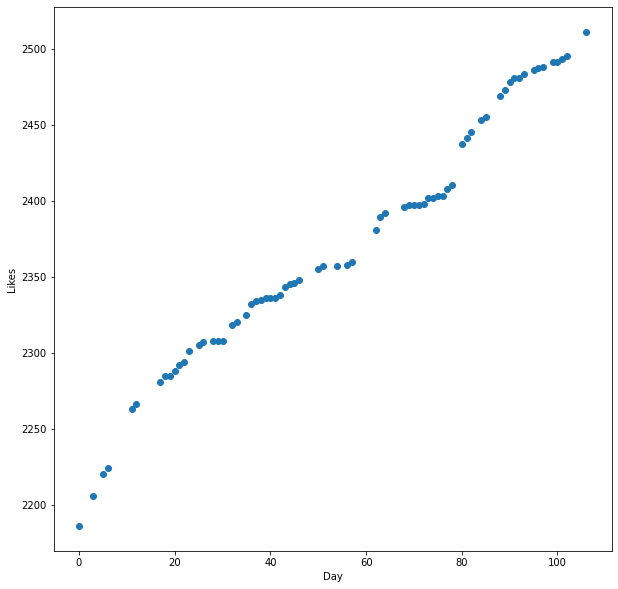

In [ ]:
data0 = np.array(df.loc[:, 'Day':'Likes'])

#Shuffle the data
data1 = np.random.permutation(data0)

#Sort the first 70 pairs (x, y) and use it as our training set
training_set = np.sort(data1[:70].T).T

#Shows the first 10 data
print(training_set[:10].T)

#Arrays of x and y
days = np.sort(training_set[:70, 0])
likes = np.sort(training_set[:70, 1])

#Training set size
m = len(likes)

plt.xlabel('Day')
plt.ylabel('Likes')
plt.scatter(days, likes)

#Choosing the hypothesis function

Here is the plot for the total number of likes of the **GDSC**'s Facebook page for 107 days from **31/12/2020**. First, we choose the hypothesis fucntion $f$<sub>$θ$</sub>($x$) = $θ$<sub>0</sub> + $θ$<sub>1</sub>$x$ (linear one-variable function). We will use θ<sub>0</sub> = 2186 and θ<sub>1</sub> = 0.

In [ ]:
theta0 = 2186
theta1 = 0

t_vect = np.array([[theta0], [theta1]])
print(t_vect)

#Change the x matrix to a (m x 2) matrix

x_0 = np.ones((m, 1))
x_1 = days.reshape(m, 1)

x = np.hstack((x_0, x_1))
y = likes.reshape(m, 1)

mean = np.mean(y)

print(x[:10])

[[2186]
 [   0]]
[[ 1.  0.]
 [ 1.  3.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]]


#Find the Cost Function

Now we write the cost function for this hypothesis. 
$J$($θ$<sub>1</sub>) = $\frac{1}{2m}\sum_{i=1}^m$ ($f$<sub>$θ$</sub>($x$<sub>i</sub>) - $y$<sub>i</sub>)$^2$, with $m$ is the number of training 
example. (I am only considering $θ$<sub>1</sub> for simplicity)



In [ ]:
def calculate_cost(t_vect, x_matrix, y_matrix) : 
    """Calculate the cost function for linear regression model"""

    cost_matrix = np.dot(x_matrix, t_vect) - y_matrix
    
    return np.sum(np.square(cost_matrix)) / (2 * m)

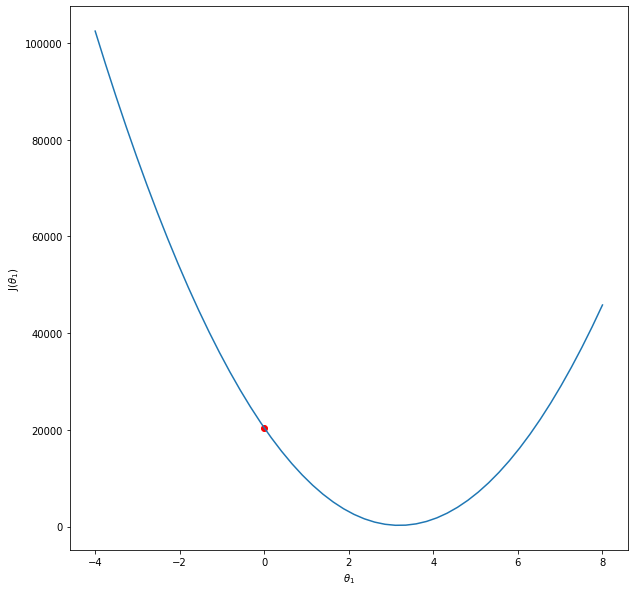

In [ ]:
theta1_lst = np.linspace(-4, 8)
cost_lst = []

#Calculate the cost function for every theta1 from -4 to 8
for theta in theta1_lst:
    t_vect_temp = np.array([[theta0], [theta]])
    cost_lst.append(calculate_cost(t_vect_temp, x, y))
cost_lst = np.array(cost_lst)

plt.xlabel(r'$\theta_1$')
plt.ylabel('J(' + r'$\theta_1)$')

plt.scatter(theta1, calculate_cost(t_vect, x, y), c='red')
plt.plot(theta1_lst, cost_lst)

#Use Gradient Descent to optimize the model

From the plot of data above, we can see that the line has not fit the data, which means the hypothesis $h$<sub>$θ$</sub> is not sufficient for predicting new values. This is called UNDERFITTING. If we want to be more precisely, we have to minimize the result of cost function $J$($θ$<sub>0</sub>, $θ$<sub>1</sub>), meaning find the local minima of the function. To achieve this, we use the Gradient Descent. The GD formula for this will be:<br><br>

>$θ$<sub>0</sub> = $θ$<sub>1</sub> - $α$ $\frac{∂}{∂θ_0}$ $J$($θ$<sub>0</sub>)<br>
>$θ$<sub>1</sub> = $θ$<sub>1</sub> - $α$ $\frac{∂}{∂θ_1}$ $J$($θ$<sub>1</sub>)<br>
>This is equivalent to:<br>
>$θ$<sub>0</sub> = $θ$<sub>0</sub> - $α$ $\frac{1}{m}$ $\sum_{i=1}^m$ (($f$<sub>$θ$</sub>($x$<sub>i</sub>) - $y$<sub>i</sub>))<br>
>$θ$<sub>1</sub> = $θ$<sub>1</sub> - $α$ $\frac{1}{m}$ $\sum_{i=1}^m$ (($f$<sub>$θ$</sub>($x$<sub>i</sub>) - $y$<sub>i</sub>)$x$<sub>i</sub>)

In [ ]:
def gradient_func(theta, x_matrix, y_matrix):
    """Find the gradient of the given model"""

    gradient_matrix = np.dot(x_matrix.T, (np.subtract(np.dot(x_matrix, theta), y_matrix)))
    
    return gradient_matrix / m

In [ ]:
def gradient_descent(theta, x_matrix, y_matrix, threshhold = 1.0e-6, max_iterations=1000, learning_rate=1e-4) :
    """Optimize θ1 to minimize the cost function and return 2 arrays contain points 
    on the cost function plot for which the gradient descent visited each iteration"""

    theta1_history = theta[1][0]
    j_history = calculate_cost(theta, x_matrix, y_matrix)
    i = 0
    diff = 1e10

    while i < max_iterations and diff > threshhold:
        theta = theta - learning_rate * gradient_func(theta, x_matrix, y_matrix)
        theta1_history = np.vstack((theta1_history, theta[1][0]))
        j_history = np.vstack((j_history, calculate_cost(theta, x_matrix, y_matrix)))

        i += 1
        diff = np.absolute(j_history[-1] - j_history[-2])
        
    return theta, theta1_history, j_history

[[2186.90589965]
 [   3.182753  ]]


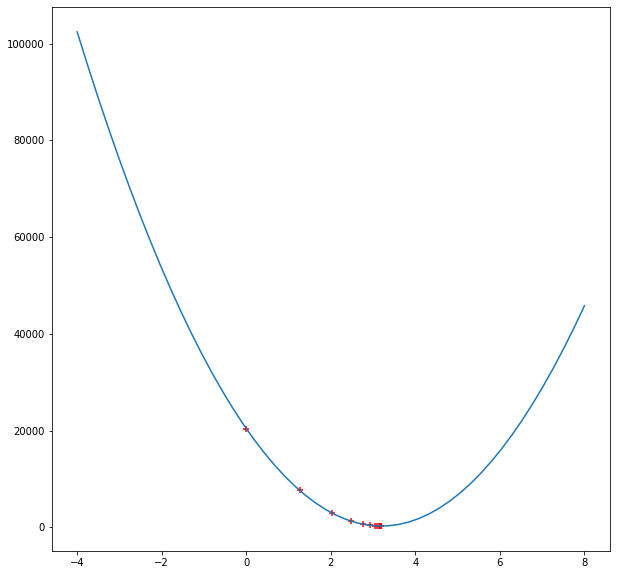

In [ ]:
t_vect, theta1_arr, j_arr = gradient_descent(t_vect, x, y)

print(t_vect)

plt.scatter(theta1_arr.T, j_arr.T, c='red', marker='+')
plt.plot(theta1_lst, cost_lst)

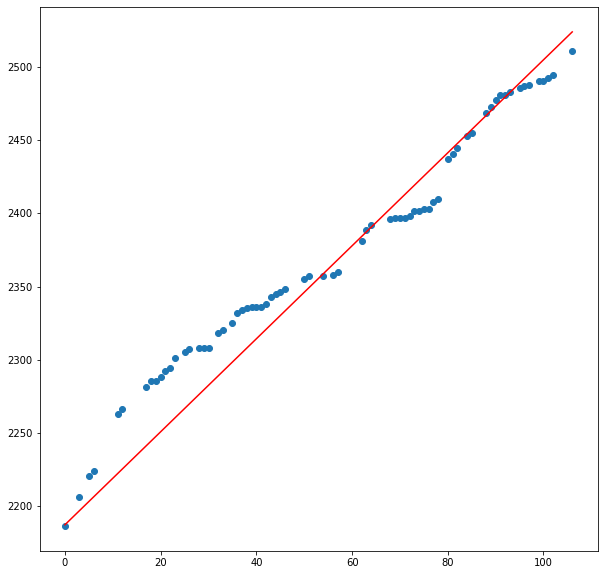

In [ ]:
plt.scatter(days, likes)
plt.plot(days, np.dot(x, t_vect).reshape(1, m)[0], color='red')

#Gradient Descent Performance

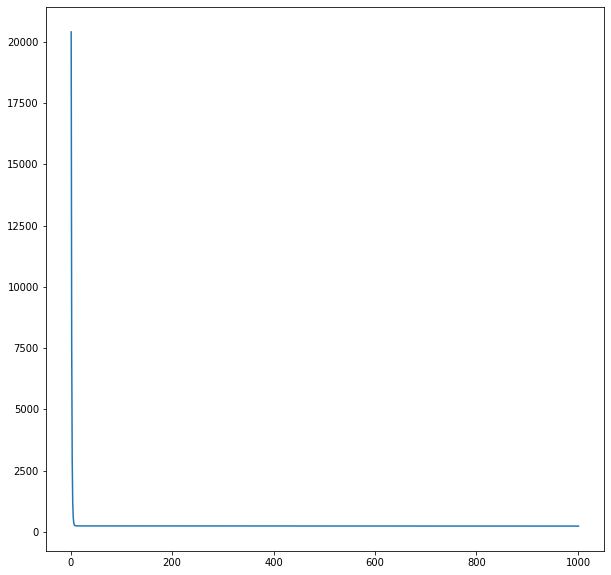

In [ ]:
plt.plot(range(1, len(j_arr) + 1), j_arr.reshape(1, len(j_arr))[0])

#Testing and evaluating the model

After finish optimizing the model, we use the unused data to test our model.

In [ ]:
#test 
def get_num_likes(day=0):
    global t_vect
    return t_vect[0][0] + t_vect[1][0] * day

col_names = ['Day','Predicted','Actual','Error'] 
test_set = np.sort(data1[70:].T).T 
predicted_values = np.around(get_num_likes(test_set[0:, 0]))
real_values = test_set[0:, 1]

diff = predicted_values - real_values

with open('/content/drive/MyDrive/Colab Notebooks/Data/test.csv', 'w') as f:
    f.write(','.join(col_names) + '\n')
    for i in range(len(test_set)):
        f.write(','.join([str(test_set[i][0]), str(predicted_values[i]), 
                          str(real_values[i]), str(diff[i] / real_values[i] * 100)]) + '\n')

To how fit is the model, we calculate R$^2$ (R-Squared value) of the model.
<br>
$R^2$ = 1 - $\frac{J}{SSTO}$<br><br>

SSTO (Total Sum of Square) is calculated according to this formula:<br>
$SSTO$ = $\frac{1}{2m}$ $\sum_{i=1}^{m}$ $(y_{mean} - y_i)^2$<br>

In [ ]:
SSTO = np.sum(np.square(mean - y)) / (2 * m)

r_square = 1 - (calculate_cost(t_vect, x, y) / SSTO)

print('R-Squared Value = ' + str(r_square))

R-Squared Value = 0.9247201340616541


The $R^2$ is 0.92, which is a good fit model, can make good predictions without being overfitted

# Changing the hypothesis

In the previous model, the $R^2$ = 0.92, but we can do better. Now I am going to change my hypothesis by using a different basis function $f$<sub>$θ$</sub>($x$) = $θ$<sub>0</sub> + $θ$<sub>1</sub> $\sqrt($x$)$ + $θ$<sub>2</sub>$x$

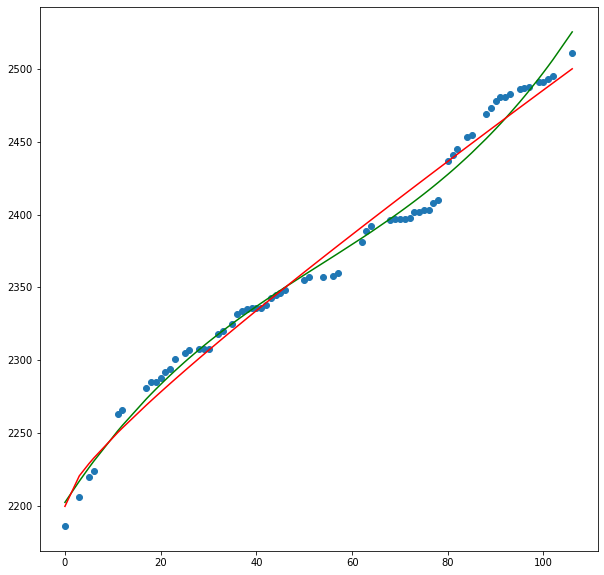

In [ ]:
t0 = 2199.55779
t1 = 8.622317
t2 = 1.998494

theta0 = 2202.2975324712297
theta1 = 5.01399360
theta2 = -5.49625136e-2
theta3 = 3.43653139e-4

plt.scatter(days, likes)
plt.plot(days, theta0 + theta1 * days + theta2 * days ** 2 + theta3 * days ** 3, c='green')
plt.plot(x, t0 + t1 * x ** 0.5 + t2 * x, c='red')

In [ ]:
def hypothesis_3(theta0, theta1, theta2, theta3, x_matrix):
    return (theta0 + theta1 * x_matrix + theta2 * x_matrix ** 2 + theta3 * x_matrix ** 3)
def cost_func2(theta0, theta1, theta2, theta3, x_matrix, y_matrix) :
    return np.sum((hypothesis_3(theta0, theta1, theta2, theta3, x_matrix) - y_matrix) ** 2) / (2 * len(x_matrix))

In [ ]:
#test 
def get_num_likes(day=0):
    global t0, t1, t2
    return t0 + t1 * day ** 0.5 + t2 * day

def cost_func1(theta0, theta1, theta2, x_matrix, y_matrix) :
    return np.sum((theta0 + theta1 * x_matrix ** 0.5 + theta2 * x_matrix - y_matrix) ** 2) / (2 * len(x_matrix))

r_square = 1 - cost_func1(t0, t1, t2, days, likes) / SSTO

r_square = 1 - cost_func2(theta0, theta1, theta2, theta3, days, likes) / SSTO
print("R-Squared value = " + str(r_square))

R-Squared value = 0.9874484434104936


The $R^2$ = 0.97895 and 0.98745 which is higher than before. Hence, base on the demand, we can choose a simple or a complicated hypothesis (unless it is underfitted or overfitted). Although higher $R^2$ can sometimes lead to overfitting.